In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.color_palette("muted")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#%matplotlib inline

In [30]:
df = pd.read_csv('../data/fitting_data.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df.fillna(0)
y = df.pop('music').values
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=X[:,2])

In [31]:
# Pipeline dictionary
pipelines = {
    'l1' : make_pipeline(StandardScaler(), LogisticRegression( penalty = 'l1', random_state=123)),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression( penalty = 'l2', random_state=123, solver = 'lbfgs')),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
#     'linsvc' : make_pipeline(StandardScaler(), SVC(kernel='linear',random_state=123),probability=True),
#     'rbfsvc' : make_pipeline(StandardScaler(), SVC(kernel='rbf'),probability=True)
}

# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}

l2_hyperparameters = {
    'logisticregression__C' : np.linspace(1e-3, 1e3, 10),
}

# Random Forest hyperparameters
rf_hyperparameters = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]
}

# Boosted Tree hyperparameters
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [50, 100, 150, 200],
    'gradientboostingclassifier__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

# linsvc_hyperparameters = {
#     'svc__C': [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
# }

# rbfsvc_hyperparameters = {
#     'svc__C': [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3],
#     'svc__gamma' : [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]
# }
# # Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters, 
    'l2' : l2_hyperparameters, 
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
#     'linsvc' : linsvc_hyperparameters,
#     'rbfsvc' : rbfsvc_hyperparameters
    
}

In [35]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], scoring = 'neg_log_loss', cv=10, refit=True)

    # Fit model on X_train, y_train
    model.fit(X_train, y_train)    
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model    
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.


In [36]:
for name, model in fitted_models.items():
    pred = fitted_models[name].predict_proba(X_test)
    # Get just the prediction for the positive class (1)
    pred = [p[1] for p in pred]
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    # Calculate AUROC
    print(name, auc(fpr, tpr))

l1 0.7258064516129031
l2 0.7258064516129031
rf 0.613880742913001
gb 0.6725317693059628


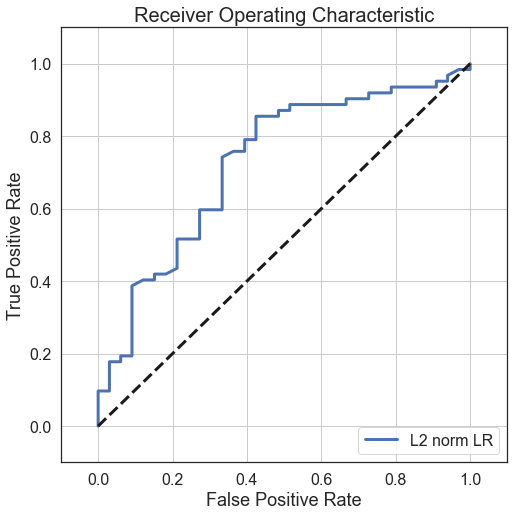

In [186]:
pred = fitted_models['l2'].predict_proba(X_test)
pred = [p[1] for p in pred]
fpr, tpr, thresholds = roc_curve(y_test, pred)

# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic',fontsize=20)

# Plot ROC curve
plt.plot(fpr, tpr, label='L2 norm LR',linewidth=3)
plt.legend(loc='lower right',fontsize=16)

# Diagonal 45 degree line
plt.plot([0,1],[0,1], 'k--',linewidth=3)

# Axes limits and labels
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate',fontsize=18)
plt.xlabel('False Positive Rate',fontsize=18)
plt.tick_params(labelsize=16)
plt.grid(True)
plt.show()
fig.savefig('../plots/ROC.pdf',bbox_inches='tight')

In [183]:
coefficients = fitted_models['l2'].best_estimator_.named_steps['logisticregression'].coef_.reshape(-1,1)[:,0]
features = np.array(df.columns)
coefficients_inds = coefficients.argsort()
sorted_coefficients = coefficients[coefficients_inds[::-1]]
sorted_features = features[coefficients_inds[::-1]]
plot_colors = ['lightgrey','royalblue','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','darksalmon']

In [121]:
print(list(zip(sorted_features,sorted_coefficients)))

[('finaid', 0.38685820922671843), ('caucasian', 0.30273284566678893), ('african_american', 0.2299087119489538), ('native_american', 0.41180184448267365), ('latino', 0.09850105296783224), ('asian', -0.577657298981411), ('other_race', -0.08754084140039699), ('race_num', -0.17774894697051336), ('male', 0.09299588636404481), ('female', -0.09299588636404402), ('median_income', -0.07497300655532839)]


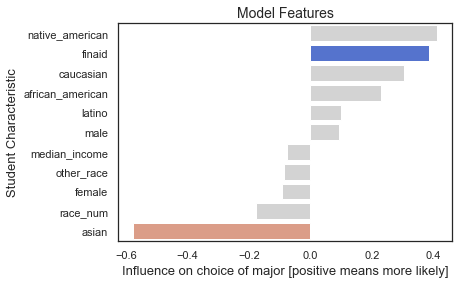

In [184]:
ax = sns.barplot(x=sorted_coefficients,y=sorted_features,palette=plot_colors)
ax.set_xlabel('Influence on choice of major [positive means more likely]',fontsize=13)
ax.set_ylabel('Student Characteristic',fontsize=13)
plt.title('Model Features',fontsize=14)
plt.tick_params(labelsize=11)
fig = ax.get_figure()
fig.savefig('../plots/coefficients.pdf',bbox_inches='tight')